In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from math import *

In [2]:
l = 0.047

print(l*0.05)

0.00235


In [3]:
c_1, c_2 = sp.symbols('c_1 c_2')

C_equiv = (c_1+c_2)/(c_1 * c_2)

sp.diff(C_equiv,c_1)

1/(c_1*c_2) - (c_1 + c_2)/(c_1**2*c_2)

In [4]:
sp.diff(C_equiv,c_2)

1/(c_1*c_2) - (c_1 + c_2)/(c_1*c_2**2)

In [5]:
c1 = 0.33 * 10**(-6)
c2 = 22 * 10**(-9)

C = c1*c2/(c1+c2)

print(C)

2.0625e-08


In [6]:
f0_t = 1/(2*pi*sqrt(l*C))

print(f0_t)

5111.804360000121


In [7]:
s_f0 = 50 #Hercios

print(sqrt(2)*s_f0)

70.71067811865476


In [8]:
B = 170 #Ancho de banda en Hz
s_B = sqrt(2)*50

f_0 = 4920

s_f_0 = 50

Q = f_0/B

print(Q)

s_Q = sqrt((s_f_0/B)**2 + (f_0*s_B/B**2)**2)

print(s_Q)

28.941176470588236
12.04153492024972


6.1115498147287814
0.25464790894703254
2.0371832715762603
0.08488263631567752
1.2223099629457561
0.050929581789406514


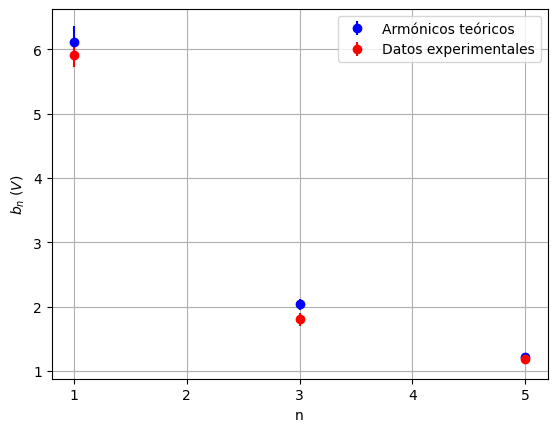

In [32]:
w,n,t,V,T = sp.symbols('w n t V T')

#Armónicos onda cuadrada

fc_1 = -V*sp.sin(n*w*t)
fc_2 = V*sp.sin(n*w*t)

ic_1 = sp.integrate(fc_1,(t,-T/2,0))
ic_2 = sp.integrate(fc_2,(t,0,T/2))

2*(ic_1 + ic_2)/T

#Representación de los coeficientes bn de la onda cuadrada

k = np.arange(1,10,1)

V = 4.8
s_V = 0.2

#Armónicos teóricos de la onda cuadrada

b_ct = []
s_b_ct = []

for k in range(1,4):
    bk = 4/(pi*(2*k-1)) * V
    s_bk = 4/(pi*(2*k-1)) * s_V
    print(bk)
    print(s_bk)
    b_ct.append(bk)
    s_b_ct.append(s_bk)

b_ce = np.array([5.92,1.8,1.19])
s_b_ce = np.array([0.2,0.1,0.05])

n = np.array([1,3,5])

plt.errorbar(n,b_ct,yerr=s_b_ct,marker='o',color='blue',linestyle='None',label='Armónicos teóricos')
plt.errorbar(n,b_ce,yerr=s_b_ce,marker='o',color='red',linestyle='None',label='Datos experimentales')
plt.xlabel('n')
plt.ylabel(r'$b_n \;(V)$')
plt.xticks(range(1,6, 1))
plt.legend(loc='upper right')
plt.grid(True)

plt.savefig('arm_cuadrada.png')

3.7286195580380297
0.16211389382774044
0.4142910620042255
0.01801265486974894
0.1491447823215212
0.006484555753109618


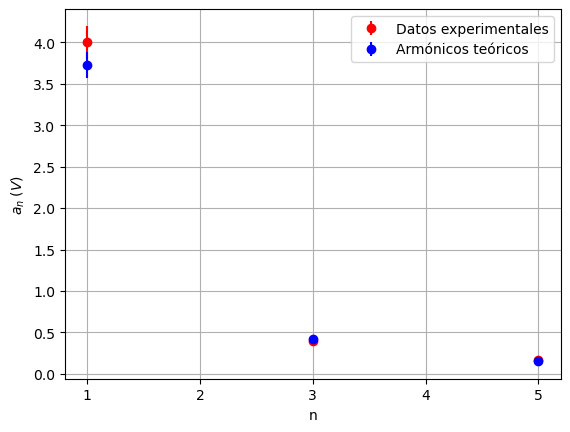

In [31]:
V = 4.6

a_t_t = []
s_a_t_t = []

for k in range(1,4):
    ak = 8/(pi**2*(2*k-1)**2) * V
    s_ak = 8/(pi**2*(2*k-1)**2) * s_V
    print(ak)
    print(s_ak)
    a_t_t.append(ak)
    s_a_t_t.append(s_ak)

a_t_e = np.array([4,0.392,0.166])
s_a_t_e = np.array([0.2,0.02,0.005])

n = np.array([1,3,5])

plt.errorbar(n,a_t_e,yerr=s_a_t_e,marker='o',color='red',linestyle='None',label='Datos experimentales')
plt.errorbar(n,a_t_t,yerr=s_a_t_t,marker='o',color='blue',linestyle='None',label='Armónicos teóricos')
plt.xlabel('n')
plt.ylabel(r'$a_n \;(V)$')
plt.xticks(range(1,6, 1))
plt.legend(loc='upper right')
plt.grid(True)

plt.savefig('arm_triangular.png')

[0.17084476 0.16733949 0.16162522 0.15388785 0.14437609]
[0.07768823211289928, 0.07306343070599616, 0.06565252786493825, 0.05589017399245565, 0.04437334484718382]


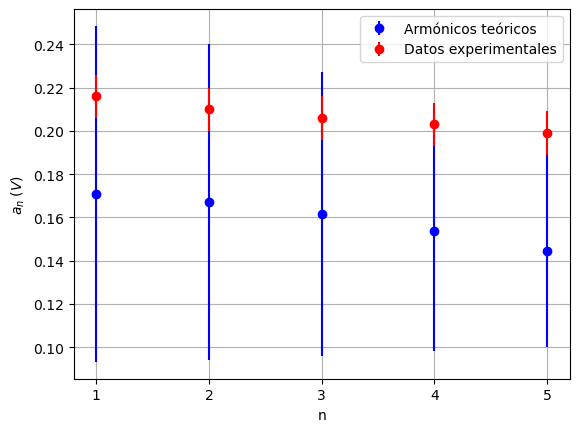

In [35]:
# Delta de Dirac

Vd = 1.88
s_Vd = 0.2
ad = 56*10**(-6)/2
s_ad = 25*10**(-6)/2
Td = 612*10**(-6)
s_Td = 25*10**(-6)

nd = np.arange(1,6,1)

an_d = 2*Vd*Td/(ad*(nd**2)*(pi**2)) * (np.sin(nd*pi*ad/Td))**2

print(an_d)

V,T,n,a = sp.symbols('V T n a')

sp.integrate((V - V*t/a),(t,0,a))*4/T

an = 2*V*T/(a*n**2*sp.pi**2) * (sp.sin(n*sp.pi*a/T))**2

der_V = sp.diff(an,V)
der_a = sp.diff(an,a)
der_T = sp.diff(an,T)

inc_an = []

for i in range(len(nd)):
    d_V = der_V.subs([(V,Vd),(a,ad),(T,Td),(n,nd[i])]).evalf()
    d_a = der_a.subs([(V,Vd),(a,ad),(T,Td),(n,nd[i])]).evalf()
    d_T = der_T.subs([(V,Vd),(a,ad),(T,Td),(n,nd[i])]).evalf()
    inc = sqrt( (d_V*s_Vd)**2 + (d_a*s_ad)**2 + (d_T*s_Td)**2)  
    inc_an.append(inc)

print(inc_an)

an_d_e = np.array([0.216,0.21,0.206,0.203,0.199])

plt.errorbar(nd,an_d,yerr=inc_an,marker='o',linestyle='None',color='blue',label='Armónicos teóricos')
plt.errorbar(nd,an_d_e,yerr=0.01,marker='o',linestyle='None',color='red',label='Datos experimentales')
plt.xlabel('n')
plt.ylabel(r'$a_n\; (V)$')
plt.grid(True)
plt.xticks(range(1,6, 1))
plt.legend(loc='upper right')
plt.savefig('pulso_dirac2.png')

